In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
links=pd.read_csv('links.csv')
tags=pd.read_csv('tags.csv')

In [55]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [56]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [57]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [58]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [59]:
movies_df=pd.merge(ratings,movies,on='movieId',how='inner')

In [60]:
movies_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Data Analysis

In [61]:
filter_ratings=movies_df.groupby('title').agg(mean_rating=('rating','mean'),number_of_ratings=('rating','count')).reset_index()
filter_ratings_100=filter_ratings[filter_ratings['number_of_ratings']>100]
filter_ratings_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              134 non-null    object 
 1   mean_rating        134 non-null    float64
 2   number_of_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [62]:
filter_ratings_100.sort_values(by='number_of_ratings',ascending=False).head()

,title,mean_rating,number_of_ratings
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278


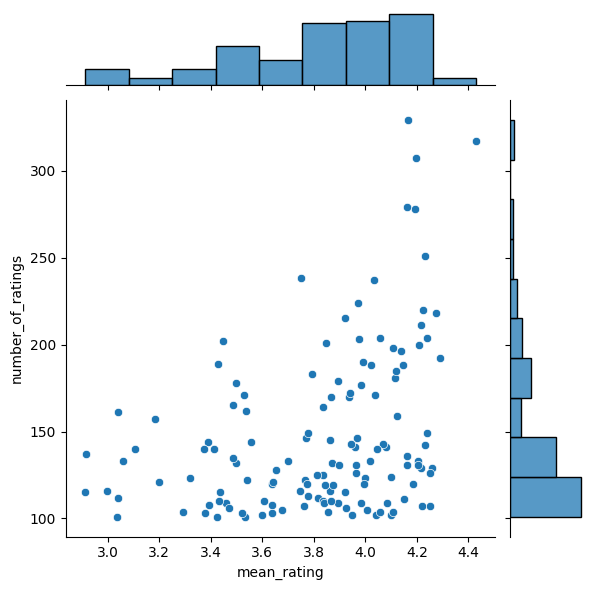

In [63]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=filter_ratings_100)

In [64]:
df_new=pd.merge(movies_df, filter_ratings_100[['title']], on='title', how='inner')
df_new.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## User-Movie Matrix

In [65]:
user_movie= df_new.pivot_table(index='userId',columns='title',values='rating')
user_movie.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
5,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


## Normalization

In [66]:
um_norm= user_movie.subtract(user_movie.mean(axis=1),axis='rows')
um_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,-0.392857,NaN,NaN,0.607143,0.607143,NaN,-0.392857,...,NaN,NaN,NaN,-1.392857,NaN,0.607143,NaN,NaN,0.607143,0.607143
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.617647,NaN,NaN,NaN,1.617647,NaN,NaN,NaN,...,NaN,NaN,-1.382353,NaN,NaN,NaN,NaN,NaN,0.617647,NaN
5,NaN,-0.461538,0.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.461538,NaN,NaN,NaN,NaN,0.538462,NaN,NaN,NaN,NaN


## Similar Users

### Pearson Correlation Method

In [67]:
user_sim=um_norm.T.corr()
user_sim.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.391797,0.180151,-0.439941,-0.029894,0.464277,1.0,-0.037987,...,0.091574,0.254514,0.101482,-0.500000,0.780020,0.303854,-0.012077,0.242309,-0.175412,0.071553
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582


### Cosine Similarity

In [68]:
user_cos=cosine_similarity(um_norm.fillna(0))
user_cos

array([[ 1.        ,  0.        ,  0.        , ...,  0.14893867,
        -0.06003146,  0.04528224],
       [ 0.        ,  1.        ,  0.        , ..., -0.04485403,
        -0.25197632,  0.18886414],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.14893867, -0.04485403,  0.        , ...,  1.        ,
         0.14734568,  0.07931015],
       [-0.06003146, -0.25197632,  0.        , ...,  0.14734568,
         1.        , -0.14276787],
       [ 0.04528224,  0.18886414,  0.        , ...,  0.07931015,
        -0.14276787,  1.        ]])

#### Finding similar users example

In [124]:
user_id=14
user_sim.drop(index=user_id,inplace=True)

In [125]:
user_sim.shape

(593, 597)

In [126]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.7

# Get top n similar users
similar_users = user_sim[user_sim[user_id]>user_similarity_threshold][user_id].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {user_id} are', similar_users)

The similar users for user 14 are userId
293    1.0
567    1.0
457    1.0
341    1.0
316    1.0
13     1.0
268    1.0
259    1.0
466    1.0
497    1.0
Name: 14, dtype: float64


C:\Users\yasha\AppData\Local\Temp\ipykernel_16360\391712384.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  similar_users = user_sim[user_sim[user_id]>user_similarity_threshold][user_id].sort_values(ascending=False)[:n]


In [127]:
[*set(ratings['userId'])]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [128]:
[movies_df.loc[ratings.loc[ratings['userId']==10]['movieId']]['title']]

KeyError: '[103335, 103339, 104374, 105211, 106489, 106696, 106782, 107141, 109374, 109487, 109853, 112006, 113275, 113394, 119145, 129428, 136020, 137595, 140110] not in index'

In [129]:
[ratings.loc[ratings['userId']==1]['movieId']]

[0         1
 1         3
 2         6
 3        47
 4        50
        ... 
 227    3744
 228    3793
 229    3809
 230    4006
 231    5060
 Name: movieId, Length: 232, dtype: int64]

In [130]:
movies_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [131]:
m=pd.read_csv('movies.csv')

In [132]:
[*set(m.loc[ratings.loc[ratings['userId']==15]['movieId']]['title'])]

KeyError: '[33493, 48304, 48774, 48780, 50872, 56174, 58559, 59315, 60069, 63859, 64614, 68237, 68954, 69757, 70286, 71057, 71264, 72998, 79132, 84152, 84954, 85414, 89745, 91500, 91529, 94864, 96610, 97938, 99114, 101864, 103249, 104841, 105504, 109374, 109487, 110102, 111759, 112556, 112852, 115149, 115713, 120466, 122882, 122886, 122904, 122922, 122924, 134130, 134853, 143385, 152077, 152081, 158872, 160980, 166528, 166635] not in index'

In [133]:
[*set(movies_df.loc[ratings.loc[ratings['userId']==5]['movieId']]['title'])] in [*set(movies_df.loc[ratings.loc[ratings['userId']==9]['movieId']]['title'])]

False

In [134]:
#Movies watched by target user
picked_userid_watched = um_norm[um_norm.index == user_id].dropna(axis=1, how='all')
picked_userid_watched

title,Ace Ventura: Pet Detective (1994),Apollo 13 (1995),Batman (1989),Batman Forever (1995),Braveheart (1995),Cliffhanger (1993),Clueless (1995),Dances with Wolves (1990),Dumb & Dumber (Dumb and Dumber) (1994),Forrest Gump (1994),...,"Mask, The (1994)",Pretty Woman (1990),Pulp Fiction (1994),Schindler's List (1993),Seven (a.k.a. Se7en) (1995),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Sleepless in Seattle (1993),Speed (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
userId,,,,,,,,,,,,,,,,,,,,,
14,-1.272727,0.727273,-1.272727,-1.272727,1.727273,0.727273,-0.272727,0.727273,-0.272727,0.727273,...,-2.272727,-0.272727,-0.272727,-0.272727,1.727273,-0.272727,0.727273,0.727273,-0.272727,0.727273


In [135]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = um_norm[um_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),Austin Powers: The Spy Who Shagged Me (1999),Babe (1995),Back to the Future (1985),...,Titanic (1997),Toy Story (1995),True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN,...,NaN,NaN,NaN,NaN,1.681818,NaN,NaN,NaN,NaN,0.181818
268,NaN,NaN,NaN,1.733333,NaN,NaN,1.733333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.733333,NaN,NaN,NaN
293,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
316,NaN,0.916667,NaN,0.416667,NaN,NaN,NaN,-0.583333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.583333,NaN
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.285714,...,NaN,1.214286,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,NaN,NaN,NaN,-1.117647,NaN,-0.117647,NaN,NaN,-2.117647,-0.117647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.117647
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.178571,NaN,0.678571,NaN,0.178571
497,NaN,NaN,-0.517241,0.482759,1.482759,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.482759,-0.517241,NaN,NaN,NaN


In [136]:
# Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_movies

title,2001: A Space Odyssey (1968),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),Austin Powers: The Spy Who Shagged Me (1999),Babe (1995),Back to the Future (1985),Batman Begins (2005),...,There's Something About Mary (1998),Titanic (1997),Toy Story (1995),True Lies (1994),"Truman Show, The (1998)",Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000
259,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.181818
268,NaN,NaN,1.733333,NaN,NaN,1.733333,NaN,NaN,NaN,NaN,...,-0.266667,NaN,NaN,NaN,NaN,NaN,1.733333,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN
316,NaN,NaN,0.416667,NaN,NaN,NaN,-0.583333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.583333,NaN
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.285714,NaN,...,NaN,NaN,1.214286,0.714286,NaN,NaN,NaN,NaN,NaN,NaN
457,NaN,NaN,-1.117647,NaN,-0.117647,NaN,NaN,-2.117647,-0.117647,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.117647
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.321429,...,NaN,NaN,NaN,NaN,NaN,1.178571,NaN,0.678571,NaN,0.178571
497,NaN,-0.517241,0.482759,1.482759,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.482759,-0.517241,NaN,NaN,NaN


In [137]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
    
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
5,Apocalypse Now (1979),1.733333
35,Goodfellas (1990),1.733333
73,Taxi Driver (1976),1.482759
3,American History X (1998),1.482759
22,Eternal Sunshine of the Spotless Mind (2004),1.221924
37,Harry Potter and the Sorcerer's Stone (a.k.a. ...,1.178571
58,One Flew Over the Cuckoo's Nest (1975),1.108046
32,"Godfather, The (1972)",1.108046
66,"Sixth Sense, The (1999)",1.032815
78,"Truman Show, The (1998)",1.000000


### Predictions

In [138]:
# Average rating for the picked user
avg_rating = user_movie[user_movie.index == user_id].T.mean()[user_id]

# Print the average movie rating for user 1
print(f'The average movie rating for user {user_id} is {avg_rating:.2f}')

The average movie rating for user 14 is 3.27


In [140]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)

,movie,movie_score,predicted_rating
5,Apocalypse Now (1979),1.733333,5.006061
35,Goodfellas (1990),1.733333,5.006061
73,Taxi Driver (1976),1.482759,4.755486
3,American History X (1998),1.482759,4.755486
22,Eternal Sunshine of the Spotless Mind (2004),1.221924,4.494651
37,Harry Potter and the Sorcerer's Stone (a.k.a. ...,1.178571,4.451299
58,One Flew Over the Cuckoo's Nest (1975),1.108046,4.380773
32,"Godfather, The (1972)",1.108046,4.380773
66,"Sixth Sense, The (1999)",1.032815,4.305542
78,"Truman Show, The (1998)",1.000000,4.272727
